[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/2bf9gfaw)

# Estudio Comparativo de Algoritmos de Clasificación para la Calidad de Vinos

## Introducción

En este notebook, se realizará un estudio comparativo de modelos de clasificación para la calidad de vinos. El dataset utilizado es el [Wine Quality Dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/code) de la Kaggle, que contiene 11 variables predictoras y una variable objetivo, que es la calidad del vino.


**Los pasos a seguir para el desarrollo del notebook son los siguientes:**

1. Comprensión del problema
2. Análisis exploratorio de datos
3. Preprocesamiento de datos
4. Modelado
5. Evaluación de modelos
6. Conclusiones

**Los modelos a comparar son:**

* Regresión logística
* Árbol de decisión
* Random Forest
* Máquina de soporte vectorial
* Naive Bayes
* K-Nearest Neighbors
* Ensemble de modelos



## 1. Comprensión del problema

El problema consiste en predecir la calidad de un vino a partir de sus características fisicoquímicas. La variable objetivo es la calidad del vino, que es un valor entre 3 y 8 en donde 3 es la peor calidad y 8 la mejor. Las variables predictoras son 11 características fisicoquímicas del vino.

Características del dataset:

- fixed acidity (Acidez fija) : la mayoría de los ácidos del vino son fijos o no volátiles (no se evaporan fácilmente).
- volatile acidity (Acidez volátil) : la cantidad de ácido acético en el vino, que en niveles demasiado altos puede producir un sabor desagradable a vinagre.
- citric acid (Ácido cítrico) : presente en pequeñas cantidades, el ácido cítrico puede aportar "frescor" y sabor a los vinos.
- residual sugar (Azúcar residual) : la cantidad de azúcar que queda después de parar la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y los vinos con más de 45 gramos/litro se consideran dulces.
- chlorides (Cloruros) : la cantidad de sal en el vino.
- free sulfur dioxide (Dióxido de azufre libre) : la forma libre de SO2 existe en equilibrio entre el SO2 molecular (como gas disuelto) y el ion bisulfito; impide el crecimiento microbiano y la oxidación del vino.
- total sulfur dioxide (Dióxido de azufre total) : cantidad de formas libres y ligadas de S02; en concentraciones bajas, el SO2 es casi indetectable en el vino, pero en concentraciones de SO2 libre superiores a 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
- density (Densidad) : la densidad se aproxima a la del agua en función del porcentaje de alcohol y del contenido de azúcar.
- pH : describe lo ácido o básico que es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos se sitúan entre 3-4 en la escala de pH.
- sulphates (Sulfatos) : aditivo del vino que puede contribuir a los niveles de gas sulfuroso (S02), que actúa como antimicrobiano y antioxidante.
- alcohol : porcentaje de alcohol contenido en el vino.
- quality(Calidad) : calificación de la calidad del vino.

Debido a que la variable objetivo es discreta, se trata de un problema de clasificación multiclase.

## 2. Análisis exploratorio de datos

En esta sección se realizará un análisis exploratorio de datos para comprender mejor el dataset y las relaciones entre las variables.

### Pasos Clave:

* **Carga de Datos**

Se cargarán los datos en un DataFrame de Pandas para su posterior análisis. Se utilizará la función `head()` para visualizar las primeras filas del conjunto de datos.

* **Información del Dataset**

Se utilizará la función `info()` para obtener información sobre el conjunto de datos, como el número de filas y columnas, el tipo de datos de cada variable y la cantidad de valores no nulos.

* **Estadísticas Descriptivas**

Se calcularán estadísticas descriptivas para cada variable, como medias, medianas, desviaciones estándar y cuartiles. Esto proporcionará una comprensión inicial de la distribución y la dispersión de los datos.

* **Visualización de Datos**

Se utilizarán gráficos y visualizaciones para representar las relaciones entre diferentes variables. Histogramas, diagramas de dispersión y boxplots ayudarán a identificar posibles correlaciones y outliers en el conjunto de datos.


* **Correlación entre Variables**
  
Se analizará la correlación entre las variables para comprender las relaciones lineales potenciales. Esto es crucial para seleccionar las características más relevantes en fases posteriores.


**Resultados Esperados:**

- **Identificación de Tendencias:** Descubrimiento de patrones o tendencias notables en los datos.
- **Detección de Outliers:** Identificación de posibles valores atípicos que puedan afectar la precisión del modelo.
- **Entendimiento de Correlaciones:** Comprensión de las relaciones entre las variables y su relevancia para la predicción.
- **Selección de Características:** Identificación de las variables más influyentes para la predicción.

Este análisis exploratorio establecerá una base sólida para la siguiente fase, donde se realizará la preparación de los datos antes de la construcción y evaluación de modelos de aprendizaje automático.

### 2.1 Carga de Datos

In [2]:
# verificar si estamos en google colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [3]:
if IN_COLAB:
    print("Descargando y preparando los datos para Colab...")
    # Descargamos el repositorio completo como un archivo zip
    !wget -O datasets.zip https://github.com/ingrafaeln/Ciencia-de-Datos/archive/refs/heads/main.zip
    # Descomprimimos el archivo
    !unzip -q datasets.zip
    # Movemos la carpeta de datasets a una ubicación principal
    !mv Ciencia-de-Datos-main/datasets ./datasets_github
    # Limpiamos los archivos descargados que ya no son necesarios
    !rm -rf datasets.zip Ciencia-de-Datos-main
    print("Datos listos.")

Descargando y preparando los datos para Colab...
--2025-10-08 21:23:03--  https://github.com/ingrafaeln/Ciencia-de-Datos/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/ingrafaeln/Ciencia-de-Datos/zip/refs/heads/main [following]
--2025-10-08 21:23:03--  https://codeload.github.com/ingrafaeln/Ciencia-de-Datos/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.121.10
Connecting to codeload.github.com (codeload.github.com)|140.82.121.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘datasets.zip’

datasets.zip            [  <=>               ]   4.73M  12.3MB/s    in 0.4s    

2025-10-08 21:23:04 (12.3 MB/s) - ‘datasets.zip’ saved [4963204]

Datos listos.


In [5]:
import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.getcwd())

In [6]:
#--------------------------------------------------------------------------------
# PASO 1: IMPORTAR LA BIBLIOTECA NECESARIA
#--------------------------------------------------------------------------------
# Importamos la biblioteca pandas, que es fundamental para la manipulación y
# el análisis de datos en Python. La abreviamos como 'pd' por convención,
# para que sea más fácil y rápido llamarla en el resto del código.
import pandas as pd

# NOTA: Para que la línea `os.path.join(...)` funcione, también necesitarías
# importar la biblioteca 'os' al principio de tu script, así:
# import os

#--------------------------------------------------------------------------------
# PASO 2: CONSTRUIR LA RUTA DEL ARCHIVO DE FORMA DINÁMICA
#--------------------------------------------------------------------------------
# Definimos el nombre de la carpeta que contiene nuestros datasets.
# Usamos una estructura condicional (if/else en una sola línea) para decidir la ruta.
# - Si la variable 'IN_COLAB' es True, la carpeta será 'content/datasets_github'.
# - Si es False (estamos en un entorno local), la carpeta será 'datasets'.
# Esto hace que el código sea portable y funcione en diferentes entornos sin cambios.
datasets_folder_name = 'content/datasets_github' if IN_COLAB else 'datasets'

# Construimos la ruta completa hacia el archivo CSV que queremos cargar.
# Usamos 'os.path.join()' porque crea una ruta de archivo compatible con
# cualquier sistema operativo (Windows, macOS, Linux), evitando problemas con
# las barras '/' o '\'.
# La ruta se compone de:
# 1. dir_root: Una variable que debería contener la ruta del directorio raíz del proyecto.
# 2. datasets_folder_name: La carpeta que definimos en el paso anterior.
# 3. 'classification': Una subcarpeta dentro de la carpeta de datasets.
# 4. 'WineQT.csv': El nombre del archivo final.
ruta_dataset = os.path.join(dir_root, datasets_folder_name, 'classification', 'WineQT.csv')

#--------------------------------------------------------------------------------
# PASO 3: CARGAR Y MOSTRAR LOS DATOS
#--------------------------------------------------------------------------------
# Usamos la función 'read_csv' de pandas para leer el archivo ubicado en 'ruta_dataset'.
# Pandas convierte automáticamente el contenido del CSV en una estructura de tabla
# llamada DataFrame, que es muy fácil de manipular. Guardamos este DataFrame en la variable 'data'.
data = pd.read_csv(ruta_dataset)

# Utilizamos el método '.head()' del DataFrame para mostrar una vista previa
# de los datos. Por defecto, nos enseña las primeras 5 filas de la tabla.
# Esto es muy útil para confirmar que el archivo se ha cargado correctamente
# y para tener una primera idea de la estructura y el contenido de los datos.
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Exploración de los Datos

En esta sección se realizará un análisis exploratorio de datos para comprender mejor el dataset y las relaciones entre las variables.

### 2.2 Información del Dataset

Se utilizará la función `info()` para obtener información sobre el conjunto de datos, como el número de filas y columnas, el tipo de datos de cada variable y la cantidad de valores no nulos.

In [7]:
#--------------------------------------------------------------------------------
# PASO 4: OBTENER UN RESUMEN TÉCNICO DEL DATAFRAME
#--------------------------------------------------------------------------------

# Usamos el método '.info()' sobre nuestro DataFrame 'data'.
# Este método no muestra las filas de datos, sino que imprime un resumen
# completo de la estructura del DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Adicionalmente, es posible obtener información sobre el número de valores null en cada columna utilizando la función `isnull()`.

In [10]:
#--------------------------------------------------------------------------------
# PASO 5: CONTAR LOS VALORES NULOS POR COLUMNA
#--------------------------------------------------------------------------------

# Este comando encadenado nos da un recuento preciso de valores faltantes.
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**Conclusiones:**

- No hay valores nulos en el dataset
- Todas las variables son numéricas
- Hay un total de 1143 registros
- Hay 12 variables predictoras y 1 variable objetivo
- La variable objetivo es la calidad del vino
- Las variables predictoras son características fisicoquímicas del vino
- La variable objetivo es discreta, tiene valores enteros.


### 2.3 Estadísticas Descriptivas

Se calcularán estadísticas descriptivas para cada variable, como medias, medianas, desviaciones estándar y cuartiles. Esto proporcionará una comprensión inicial de la distribución y la dispersión de los datos.

In [11]:
#--------------------------------------------------------------------------------
# PASO 6: OBTENER ESTADÍSTICAS DESCRIPTIVAS DEL DATASET
#--------------------------------------------------------------------------------

# Usamos el método .describe() para calcular estadísticas fundamentales de las columnas numéricas.
# Luego, encadenamos .round(2) para redondear los resultados a 2 decimales,
# lo que mejora enormemente la legibilidad de la tabla.
data.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66,804.97
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81,464.00
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.20,0.55,9.50,5.00,411.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00,794.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00,1209.50
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00,1597.00


**Conclusiones:**

- Las variables predictoras tienen diferentes escalas-> es necesario normalizar los datos


### 2.4 Visualización de Datos

Se utilizarán gráficos y visualizaciones para representar las relaciones entre diferentes variables. Histogramas, diagramas de dispersión y boxplots ayudarán a identificar posibles correlaciones y outliers en el conjunto de datos.

- **Histogramas:** Se utilizarán histogramas para visualizar la distribución de las variables predictoras y la variable objetivo. Esto ayudará a identificar posibles outliers y a comprender mejor la distribución de los datos.
- **Diagramas de Densidad:** Se utilizarán diagramas de densidad para visualizar la distribución de las variables predictoras en función de las clases de la variable objetivo. Esto ayudará a identificar cualquier diferencia significativa en la distribución de las variables predictoras para cada clase de la variable objetivo.
- **Boxplots:** Se utilizarán boxplots para visualizar la distribución de las variables predictoras y la variable objetivo. Esto ayudará a identificar posibles outliers y a comprender mejor la distribución de los datos.

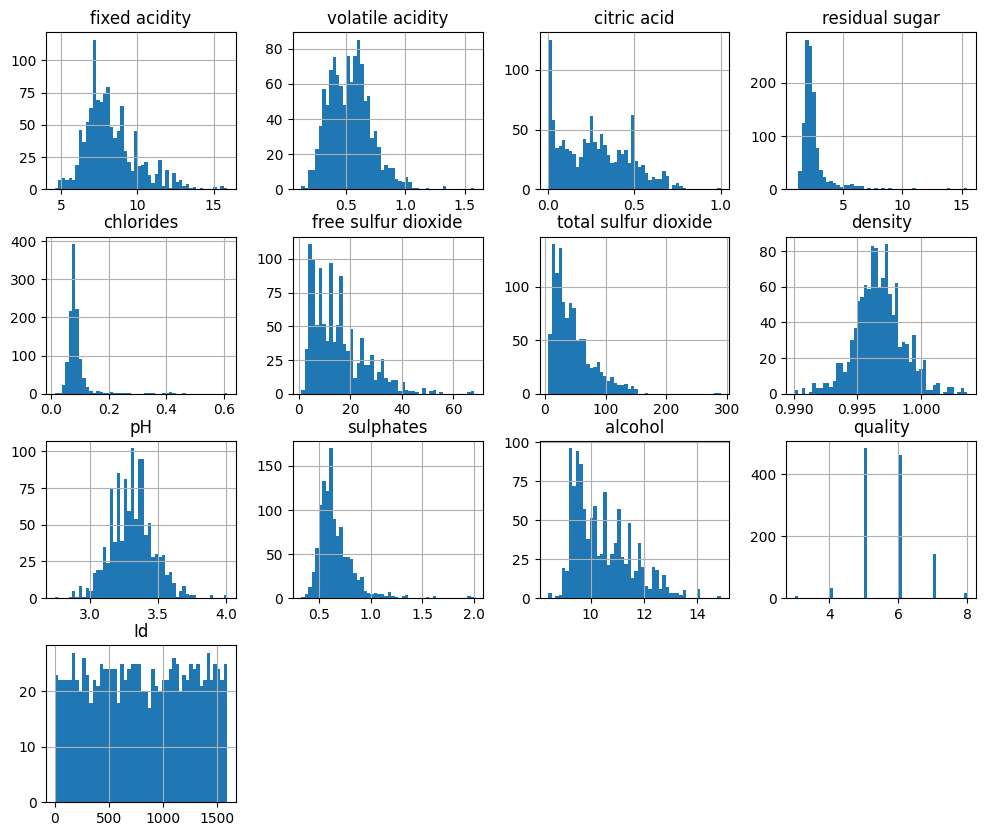

In [12]:
#--------------------------------------------------------------------------------
# PASO 7: VISUALIZAR LA DISTRIBUCIÓN DE CADA VARIABLE
#--------------------------------------------------------------------------------

# Importamos las bibliotecas de visualización de datos más importantes de Python.
# Matplotlib es la biblioteca fundamental para crear gráficos. 'pyplot' es su
# módulo más usado y lo abreviamos como 'plt' por convención.
import matplotlib.pyplot as plt

# Seaborn es una biblioteca construida sobre Matplotlib que permite crear gráficos
# estadísticos más atractivos y con menos código. Aunque no la usamos directamente
# en la siguiente línea, importarla a menudo mejora el estilo visual por defecto
# de los gráficos de Matplotlib. La abreviamos como 'sns'.
import seaborn as sns

# Generamos un histograma para CADA columna numérica del DataFrame 'data'.
# Este es un método muy conveniente de pandas que automatiza la creación de los gráficos.
# - bins=50: Un histograma agrupa los datos en "contenedores" o "barras" (bins).
#            Este parámetro le dice a la función que divida el rango de datos de
#            cada variable en 50 intervalos iguales. Un número mayor de 'bins'
#            da un mayor detalle de la distribución, pero puede verse "ruidoso".
# - figsize=(12,10): Controla el tamaño total de la figura que contendrá todos
#                    los histogramas, en pulgadas (ancho x alto). Un tamaño más
#                    grande ayuda a que los gráficos no se vean amontonados.
data.hist(bins=50, figsize=(12,10))

# Este comando de Matplotlib le dice al programa: "Muestra en pantalla todos los
# gráficos que se han creado hasta ahora". En entornos como Colab o Jupyter
# a veces los gráficos aparecen solos, pero es una buena práctica incluir
# plt.show() para renderizar la figura de forma explícita.
plt.show()

**Conclusiones de los Histogramas:**

- **fixed acidity:** La mayoría de los vinos tienen una acidez fija entre 6 y 8.
- **volatile acidity:** La mayoría de los vinos tienen una acidez volátil entre 0.2 y 0.6.
- **citric acid:** La mayoría de los vinos tienen un ácido cítrico entre 0 y 0.5.
- **residual sugar:** La mayoría de los vinos tienen un azúcar residual entre 0 y 5.
- **chlorides:** La mayoría de los vinos tienen cloruros entre 0 y 0.1.
- **free sulfur dioxide:** La mayoría de los vinos tienen dióxido de azufre libre entre 0 y 50.
- **total sulfur dioxide:** La mayoría de los vinos tienen dióxido de azufre total entre 0 y 150.
- **density:** La mayoría de los vinos tienen una densidad entre 0.99 y 1.
- **pH:** La mayoría de los vinos tienen un pH entre 3 y 3.5.
- **sulphates:** La mayoría de los vinos tienen sulfatos entre 0.4 y 0.8.
- **alcohol:** La mayoría de los vinos tienen un contenido de alcohol entre 9 y 11.
- **quality:** La mayoría de los vinos tienen una calidad entre 5 y 6.
- La variable objetivo tiene 6 valores posibles: 3, 4, 5, 6, 7 y 8. Los cuales tienen una distribución desbalanceada.
- El atributo id no es relevante para el análisis, ya que es un identificador único para cada registro.

In [13]:
#--------------------------------------------------------------------------------
# PASO 8: ELIMINAR COLUMNAS IRRELEVANTES
#--------------------------------------------------------------------------------

# Usamos el método .drop() para eliminar la columna 'Id' de nuestro DataFrame.
# Esta operación modifica el DataFrame 'data' directamente.
data.drop('Id', axis=1, inplace=True)

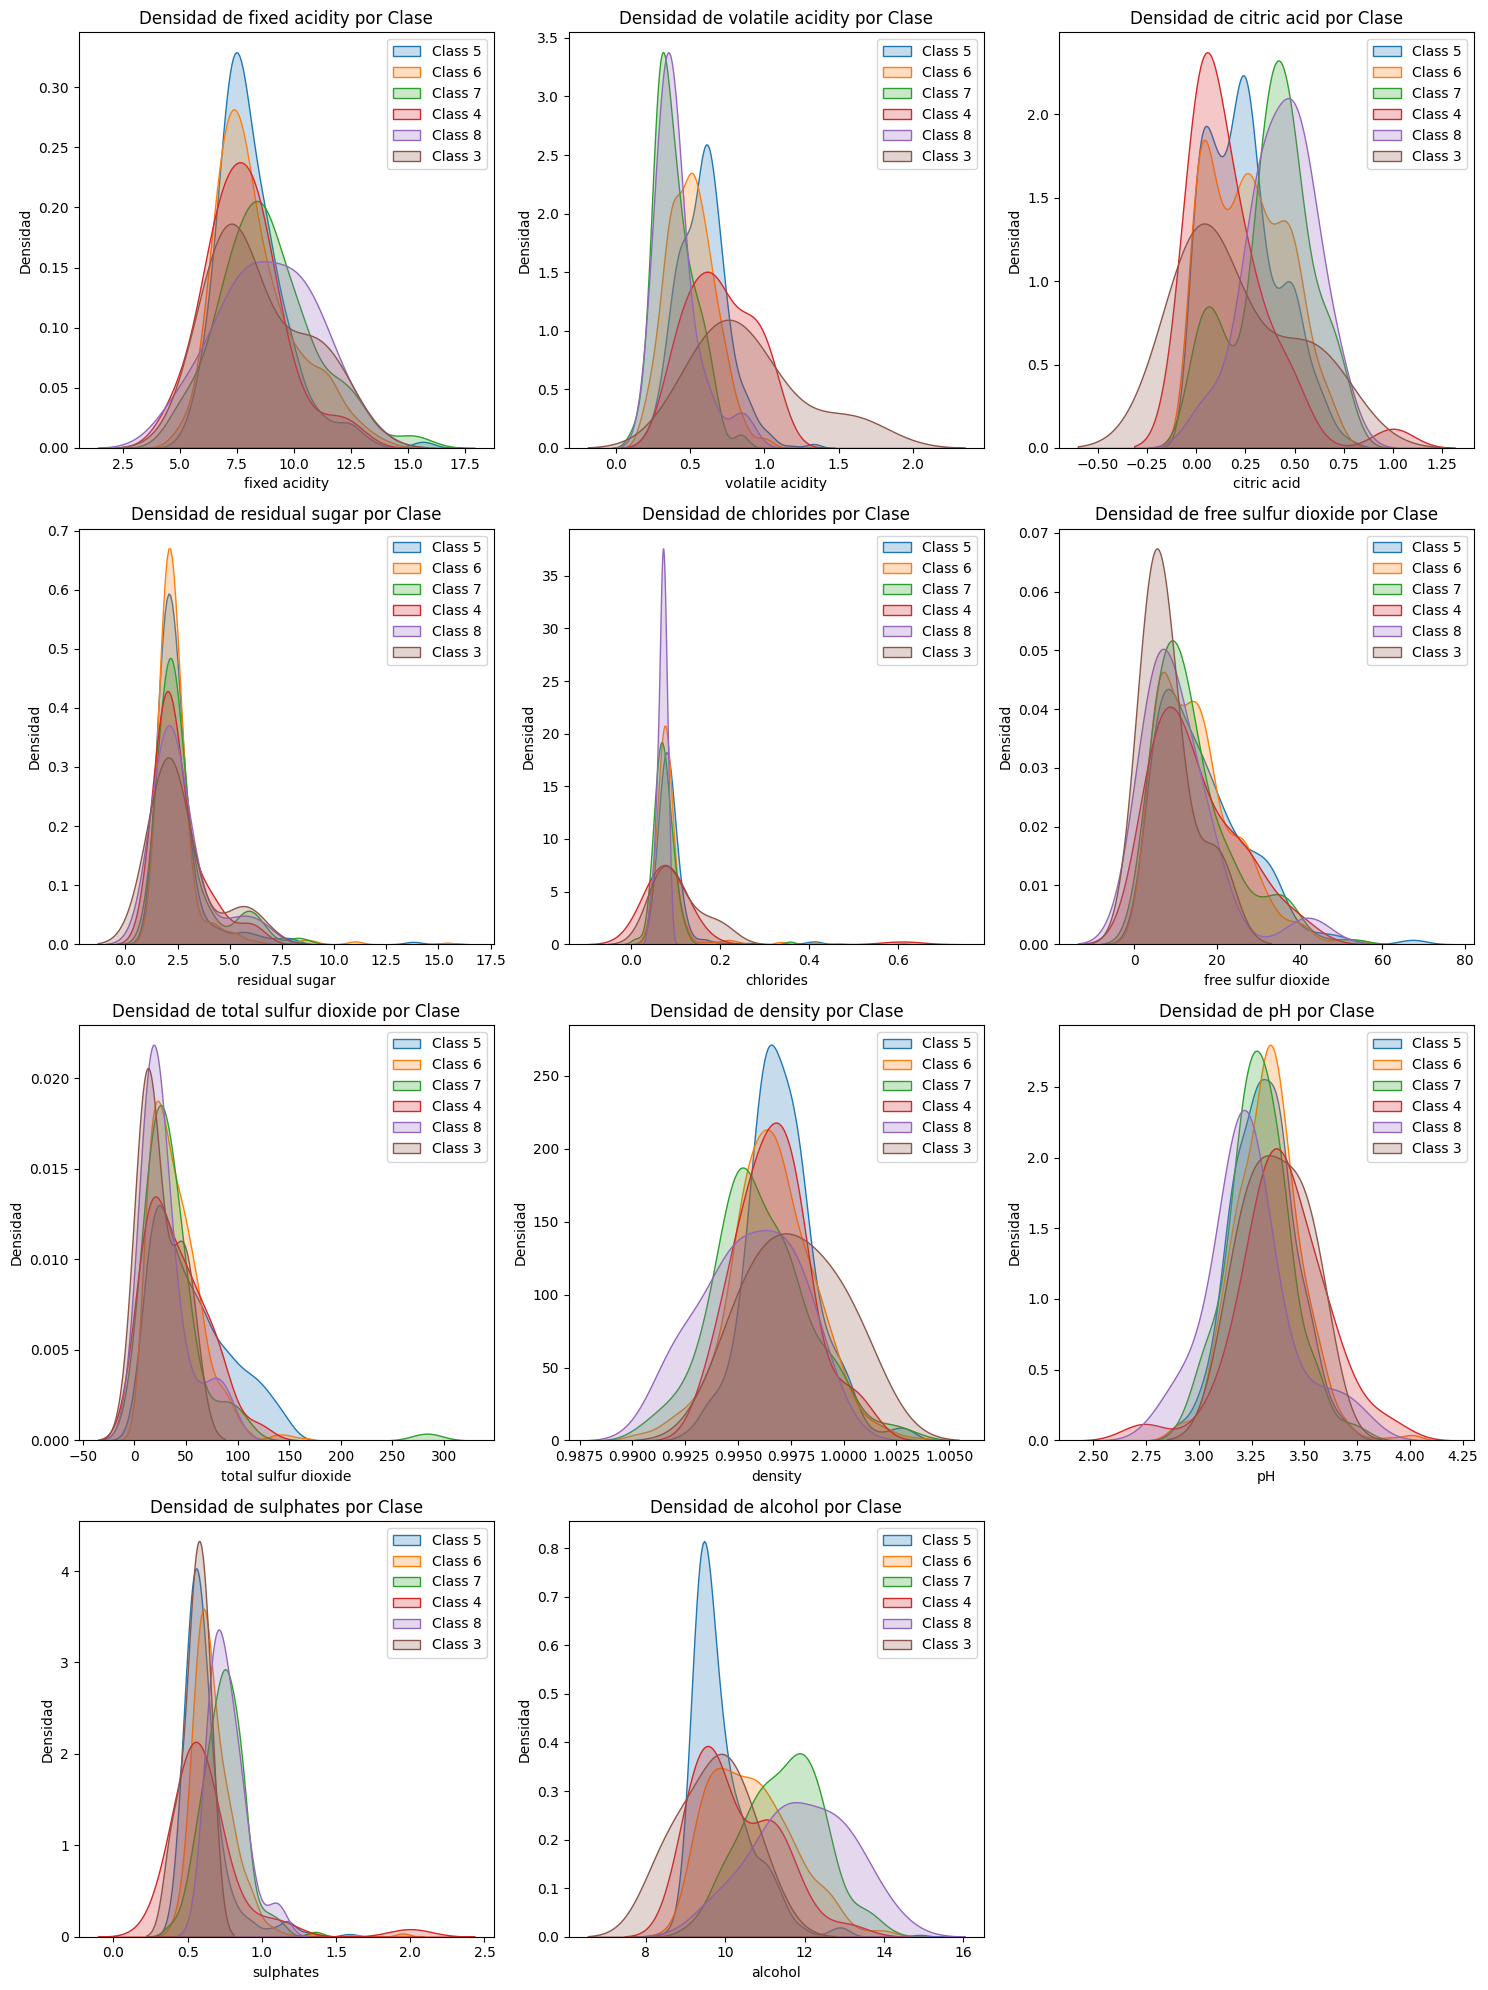

In [14]:
#--------------------------------------------------------------------------------
# PASO 9: ANÁLISIS VISUAL DE LA DISTRIBUCIÓN DE ATRIBUTOS POR CLASE
#--------------------------------------------------------------------------------

# Importamos las librearías necesarias. Seaborn y Matplotlib para la visualización,
# y NumPy para operaciones numéricas (en este caso, para calcular el tamaño de la cuadrícula).
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. PREPARACIÓN DE LA CUADRÍCULA DE GRÁFICOS ---

# Creamos una lista con los nombres de todas las columnas, EXCEPTO la columna objetivo 'quality'.
# Estas son las características o atributos que queremos analizar.
columns = data.drop('quality', axis=1).columns

# Contamos cuántas características tenemos para saber cuántos gráficos necesitamos.
n = len(columns)

# Definimos que queremos organizar nuestros gráficos en una cuadrícula con 3 columnas.
ncols = 3
# Calculamos el número de filas necesarias. Dividimos el total de gráficos (n)
# entre el número de columnas (ncols) y redondeamos hacia ARRIBA (np.ceil) para asegurarnos
# de tener espacio para todos. Luego lo convertimos a un número entero.
nrows = np.ceil(n / ncols).astype(int)

# --- 2. CREACIÓN DE LA FIGURA Y LOS SUBGRÁFICOS ---

# Creamos la "tela" o "lienzo" (fig) y una cuadrícula de subgráficos vacíos (axs).
# `plt.subplots` devuelve ambos. Le indicamos las filas, columnas y el tamaño total del lienzo.
# La altura del lienzo es dinámica (nrows*5) para que los gráficos no se aplasten.
fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

# --- 3. BUCLE PRINCIPAL PARA DIBUJAR LOS GRÁFICOS ---

# Iteramos simultáneamente sobre cada subgráfico (ax) y cada nombre de columna (column).
# `axs.flatten()` convierte la cuadrícula 2D de subgráficos en una lista 1D para facilitar el bucle.
# `zip` une las dos listas, dándonos pares (subgráfico, nombre_columna).
for ax, column in zip(axs.flatten(), columns):

    # Dentro de cada subgráfico, hacemos un segundo bucle a través de los valores únicos de 'quality' (3, 4, 5, etc.).
    for class_value in data['quality'].unique():
        # Usamos `sns.kdeplot` para dibujar una curva de densidad.
        # 1. Filtramos `data` para obtener solo las filas que corresponden a la calidad actual (`class_value`).
        # 2. De esas filas, seleccionamos solo los valores de la columna actual (`column`).
        # 3. Le pasamos estos datos a kdeplot.
        # 4. `label` asigna un nombre a la curva para la leyenda (ej. "Class 5").
        # 5. `ax=ax` le dice a Seaborn en CUÁL de los subgráficos de nuestra cuadrícula debe dibujar.
        # 6. `fill=True` colorea el área bajo la curva para mejorar la visibilidad.
        sns.kdeplot(data[data['quality'] == class_value][column], label=f'Class {class_value}', ax=ax, fill=True)

    # Configuramos el título y las etiquetas para el subgráfico actual.
    ax.set_title(f'Densidad de {column} por Clase')
    ax.set_xlabel(column)
    ax.set_ylabel('Densidad')
    # Mostramos la leyenda que asocia un color a cada clase de calidad.
    ax.legend()

# --- 4. LIMPIEZA Y VISUALIZACIÓN FINAL ---

# Si el número de gráficos (n) no es un múltiplo exacto del número de columnas,
# tendremos subgráficos vacíos al final. Este bucle los elimina.
# (Ej: 11 gráficos en una cuadrícula de 4x3=12, sobra 1).
for i in range(n, nrows*ncols):
    fig.delaxes(axs.flatten()[i])

# `tight_layout` ajusta automáticamente el espaciado entre los gráficos para que
# los títulos y etiquetas no se superpongan. Hace que todo se vea limpio.
plt.tight_layout()
# Muestra la figura final con todos los gráficos renderizados.
plt.show()

Un diagrama de densidad es una representación gráfica de la distribución de los datos utilizando una curva de densidad. Los diagramas de densidad se utilizan para visualizar la distribución de los datos y son especialmente útiles para comparar la distribución de los datos entre diferentes grupos o categorías.

Para interpretar un diagrama de densidad, se debe prestar atención a la forma de la curva (forma de campana, bimodal, etc.) y a la posición de la curva (izquierda, derecha, centrada, etc.). También es posible comparar la forma y la posición de varias curvas de densidad para identificar diferencias significativas en la distribución de los datos con respecto a las diferentes categorías del atributo objetivo.

Si la forma de la curva es una campana simétrica, esto sugiere una distribución normal de los datos. Si la curva es asimétrica o tiene múltiples picos, esto sugiere una distribución no normal de los datos.

- Una distribución normal implica simetría, consistencia, y permite la aplicación de técnicas estadísticas y de machine learning que asumen esa forma de distribución, facilitando el análisis y la interpretación de los datos.
- Una distribución no normal puede requerir transformaciones de los datos o el uso de técnicas estadísticas no paramétricas para su análisis.
  
**Conclusiones de los Diagramas de Densidad:**

- El análisis de los diagramas de densidad muestra algunas de las variables predictoras tienen distribuciones diferentes dependiendo de la clase de la variable objetivo. Esto sugiere que estas variables pueden ser útiles para predecir la calidad del vino. Por ejemplo la variable "alcohol" tiene una distribución diferente para cada clase de la variable objetivo.

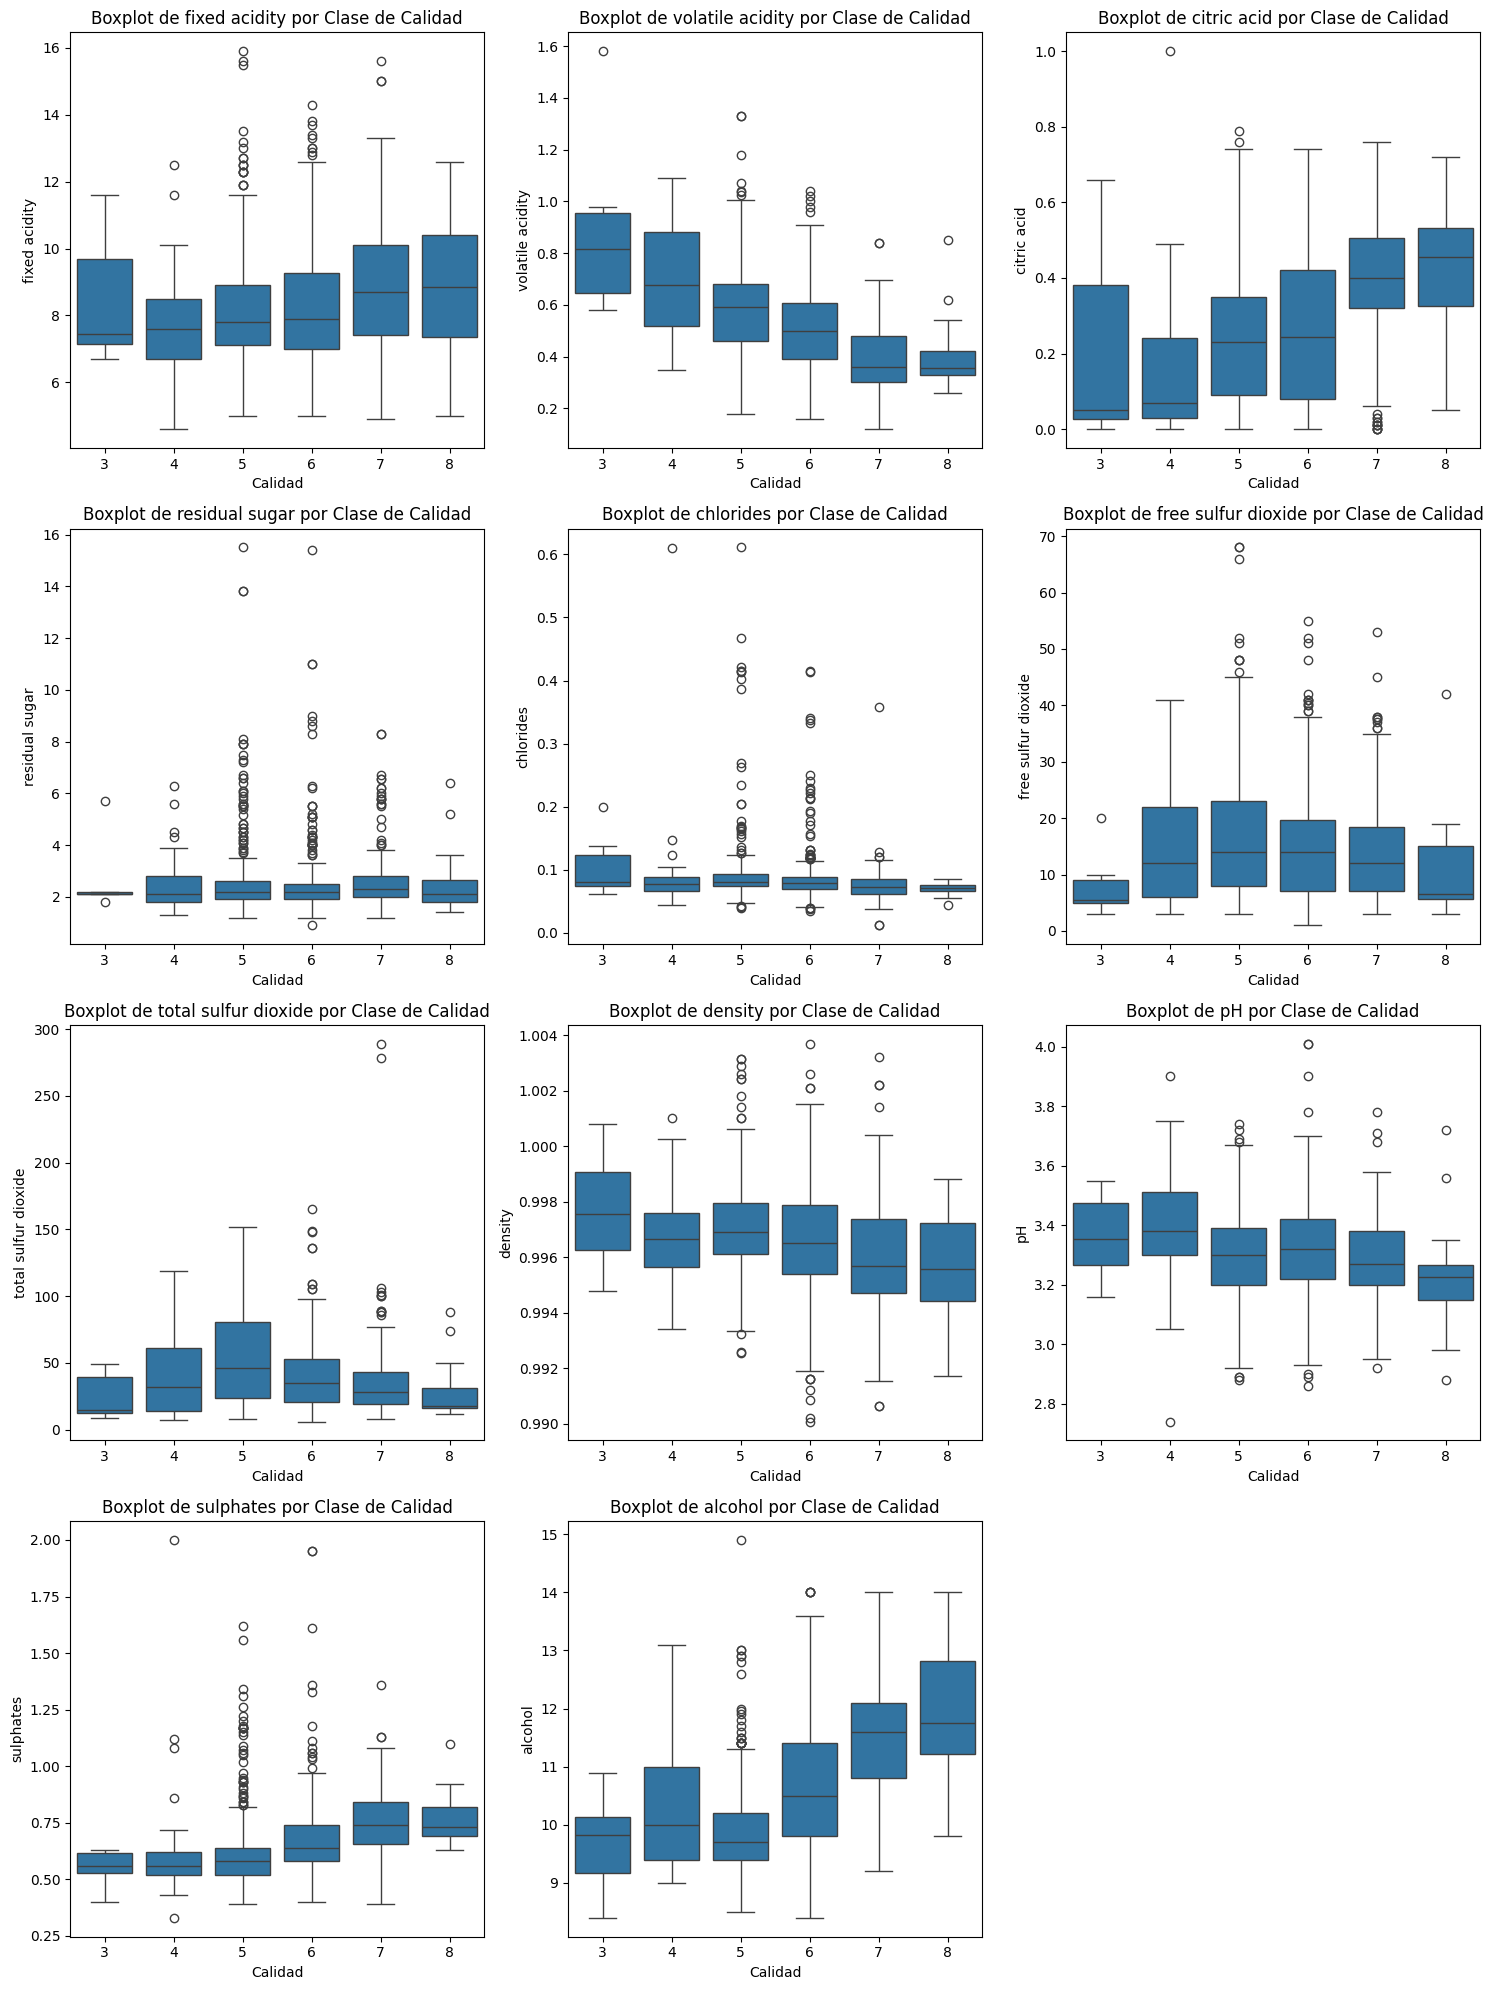

In [15]:
#--------------------------------------------------------------------------------
# PASO 10: ANÁLISIS VISUAL CON DIAGRAMAS DE CAJA (BOXPLOTS)
#--------------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. PREPARACIÓN DE LA CUADRÍCULA (Idéntico al paso anterior) ---

# Asumiendo que 'data' es tu DataFrame y 'quality' es tu columna objetivo
columns = data.drop('quality', axis=1).columns
n = len(columns)
ncols = 3
nrows = np.ceil(n / ncols).astype(int)

# --- 2. CREACIÓN DE LA FIGURA Y LOS SUBGRÁFICOS (Idéntico al paso anterior) ---

fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

# --- 3. BUCLE PRINCIPAL PARA DIBUJAR LOS GRÁFICOS ---

# La estructura del bucle es la misma: iteramos sobre cada subgráfico y cada columna.
for ax, column in zip(axs.flatten(), columns):
    # ¡AQUÍ ESTÁ EL CAMBIO! Usamos `sns.boxplot` en lugar de `sns.kdeplot`.
    # - x='quality': Especifica que los grupos en el eje X serán los valores de calidad.
    # - y=column: Especifica que los valores en el eje Y (que forman las cajas) provienen
    #             de la característica actual.
    # - data=data: Le dice a Seaborn que busque estas columnas en nuestro DataFrame.
    # - ax=ax: Asigna este boxplot al subgráfico correcto de nuestra cuadrícula.
    sns.boxplot(x='quality', y=column, data=data, ax=ax)

    # Configuramos el título y las etiquetas para el subgráfico actual.
    ax.set_title(f'Boxplot de {column} por Clase de Calidad')
    ax.set_xlabel('Calidad')
    ax.set_ylabel(column)

# --- 4. LIMPIEZA Y VISUALIZACIÓN FINAL (Idéntico al paso anterior) ---

# Eliminar los subgráficos vacíos
for i in range(n, nrows*ncols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

Un diagrama boxplot, también conocido como diagrama de caja, es una representación gráfica que muestra la distribución de un conjunto de datos numéricos a través de sus cuartiles. Aquí te explico cómo interpretar un boxplot:

- **Línea central (Mediana)**: La línea que divide la caja en dos partes representa la mediana o segundo cuartil de los datos. Esto indica el valor medio del conjunto de datos, donde la mitad de los datos son menores y la otra mitad son mayores.
- **Caja (Intervalo Interquartílico)**: La caja del boxplot representa el intervalo interquartílico (IQR), que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Esto muestra dónde se concentra la mitad central de los datos.
- **Bigotes (Valores Máximo y Mínimo)**: Los bigotes del boxplot se extienden desde la caja hasta los valores máximo y mínimo dentro de un límite determinado, que suele ser 1.5 veces el IQR por encima y por debajo de los cuartiles. Los datos fuera de estos límites se consideran valores atípicos.
- **Valores Atípicos (Outliers)**: Los puntos que se encuentran fuera de los bigotes se consideran valores atípicos o extremos. Estos pueden indicar variabilidad en los datos o posibles errores de medición.
- **Simetría y Sesgo**: La posición de la mediana dentro de la caja puede indicar si los datos están sesgados. Si la mediana está cerca del primer cuartil, los datos pueden estar sesgados hacia la derecha; si está cerca del tercer cuartil, pueden estar sesgados hacia la izquierda.

**Conclusiones de los Boxplots:**

- Los boxplots muestran la distribución de las variables predictoras y la variable objetivo. Se puede observar que algunas variables tienen outliers, como "residual sugar", "free sulfur dioxide" y "total sulfur dioxide". Esto puede afectar negativamente a los modelos de aprendizaje automático, por lo que es necesario realizar un preprocesamiento de datos para eliminar los outliers.
- Debido a que el dataset es pequeño con 1143 registros, en este ejemplo no se eliminarán los outliers. Sin embargo, en un caso real, se recomienda eliminar los outliers para mejorar la precisión del modelo.

### 2.5 Correlación entre Variables

La correlación es una medida estadística que describe la relación entre dos variables. Las variables pueden tener una correlación positiva, una correlación negativa o no tener correlación. Una correlación positiva significa que cuando el valor de una variable aumenta, el valor de la otra variable también aumenta. Una correlación negativa significa que cuando el valor de una variable aumenta, el valor de la otra variable disminuye. Una correlación de cero significa que no hay relación entre las dos variables.

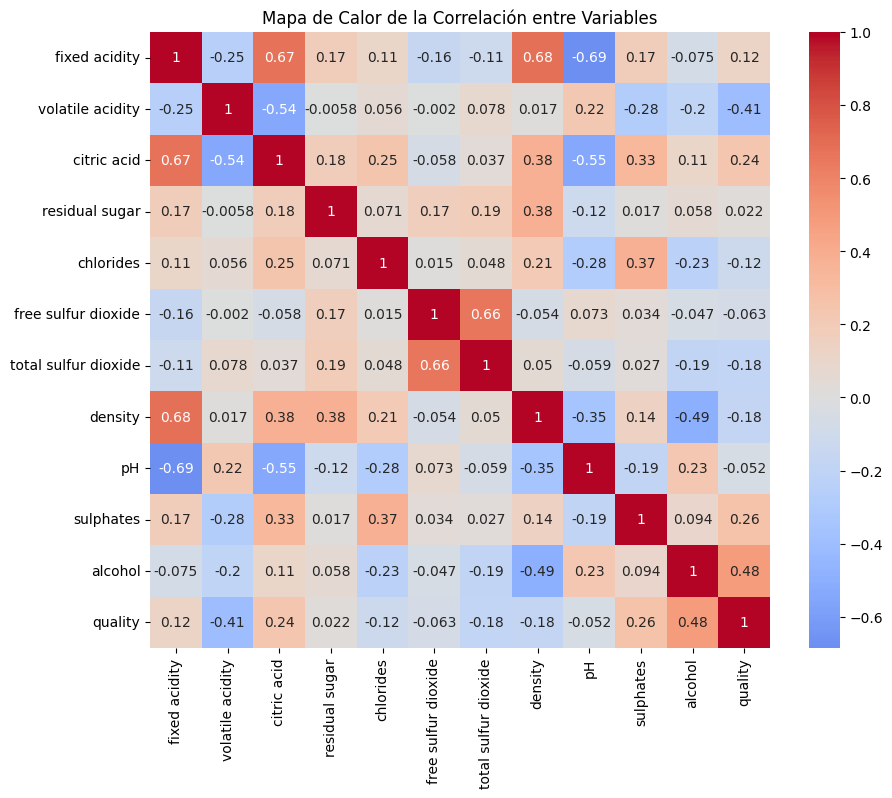

In [16]:
#--------------------------------------------------------------------------------
# PASO 11: ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES
#--------------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. CÁLCULO DE LA MATRIZ DE CORRELACIÓN ---

# Usamos el método .corr() del DataFrame de pandas. Este método calcula
# el coeficiente de correlación de Pearson entre todas las parejas de columnas numéricas.
# El resultado es una nueva tabla (DataFrame) donde tanto las filas como las columnas
# son los nombres de las variables, y cada celda contiene el coeficiente de correlación
# entre la variable de su fila y la de su columna.
correlation = data.corr()

# --- 2. VISUALIZACIÓN CON UN MAPA DE CALOR ---

# Creamos una figura de Matplotlib con un tamaño específico (10x8 pulgadas)
# para asegurarnos de que el mapa de calor sea lo suficientemente grande para ser legible.
plt.figure(figsize=(10, 8))

# Usamos la función heatmap de Seaborn para dibujar el gráfico.
# - El primer argumento es `correlation`, la matriz de datos que queremos visualizar.
# - annot=True: (annot de annotation/anotación). Esto es MUY importante. Escribe el valor
#               numérico de la correlación en cada celda del mapa.
# - cmap='coolwarm': (cmap de colormap/mapa de color). Define la paleta de colores.
#                    'coolwarm' es ideal para correlaciones: los valores positivos
#                    tienden a un color cálido (rojo), los negativos a un color
#                    frío (azul), y los cercanos a cero son neutros (blanco).
# - center=0: Fija el centro de la escala de colores en 0. Esto asegura que el color
#             neutro corresponda exactamente a una correlación de cero.
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)

# Añadimos un título al gráfico para darle contexto.
plt.title('Mapa de Calor de la Correlación entre Variables')

# Mostramos el gráfico final.
plt.show()

**Conclusiones de la Correlación:**

- Se puede observar que el atributo `fixed acidity` tiene una correlación positiva con los atributos `citric acid` y `density`. Esto significa que cuando el valor de `fixed acidity` aumenta, el valor de `citric acid` y `density` también aumenta. Por otro lado, el atributo `fixed acidity` tiene una correlación negativa con el atributo `pH`. Esto significa que cuando el valor de `fixed acidity` aumenta, el valor de `pH` disminuye.
- El atributo `free sulfur dioxide` tiene una correlación positiva con el atributo `total sulfur dioxide`. Esto significa que cuando el valor de `free sulfur dioxide` aumenta, el valor de `total sulfur dioxide` también aumenta.
- El atributo `volatile acidity` tiene una correlación negativa significativa con el atributo `quality`. Esto significa que cuando el valor de `volatile acidity` aumenta, el valor de `quality` disminuye. Esto tiene sentido, ya que un vino con una acidez volátil alta tiene un sabor desagradable a vinagre.
- El atributo `alcohol` tiene una correlación positiva significativa con el atributo `quality`. Esto significa que cuando el valor de `alcohol` aumenta, el valor de `quality` también aumenta. Esto tiene sentido, ya que un vino con un contenido de alcohol alto tiene un mejor sabor.

Como se puede observar, el análisis de correlación es una herramienta útil para comprender las relaciones entre las variables. Esto es crucial para seleccionar las características más relevantes en fases posteriores.

Una alta correlación entre dos variables se denomina multicolinealidad. La multicolinealidad puede afectar negativamente a los modelos de aprendizaje automático, ya que puede aumentar la varianza de los coeficientes de los modelos. Por lo tanto, es importante identificar las variables altamente correlacionadas y eliminarlas del conjunto de datos.

### Conclusiones del Análisis Exploratorio de Datos

- **Identificación de Tendencias**: Descubrimiento de patrones o tendencias notables en los datos.
  - Las variables predictoras tienen diferentes escalas-> es necesario normalizar los datos
  - La variable objetivo tiene 6 valores posibles: 3, 4, 5, 6, 7 y 8. Los cuales tienen una distribución desbalanceada.
  - El atributo id no es relevante para el análisis, ya que es un identificador único para cada registro.
  - El análisis de los diagramas de densidad muestra algunas de las variables predictoras tienen distribuciones diferentes dependiendo de la clase de la variable objetivo. Esto sugiere que estas variables pueden ser útiles para predecir la calidad del vino. Por ejemplo la variable "alcohol" tiene una distribución diferente para cada clase de la variable objetivo.
  - El análisis de correlación mostró que algunas variables tienen una correlación positiva o negativa significativa con la variable objetivo.
  - El análisis de correlación mostró que algunas variables tienen una correlación positiva o negativa significativa entre sí. Esto puede afectar negativamente a los modelos de aprendizaje automático, debido al problema de la multicolinealidad.
  
- **Detección de Outliers**: Identificación de posibles valores atípicos que puedan afectar la precisión del modelo.
  - Algunas variables tienen outliers, como "residual sugar", "free sulfur dioxide" y "total sulfur dioxide". Esto puede afectar negativamente a los modelos de aprendizaje automático, por lo que es necesario realizar un preprocesamiento de datos para eliminar los outliers. En este ejemplo no se eliminarán los outliers debido al tamaño del dataset (1143 registros).
- **Selección de Características**: Identificación de las variables más influyentes en la predicción del costo del seguro médico.
  - Los atributos `volatile acidity` y `alcohol` tienen una correlación significativa con la variable objetivo. Esto significa que estos atributos pueden ser útiles para predecir la calidad del vino.
  - Los atributos `fixed acidity`, `citric acid`, `density`, `pH`, `free sulfur dioxide` y `total sulfur dioxide` tienen una correlación significativa entre sí. Esto puede afectar negativamente a los modelos de aprendizaje automático, debido al problema de la multicolinealidad. Por lo tanto, es necesario eliminar algunas de estas variables del conjunto de datos. Se eliminarán los atributos `fixed acidity` y `free sulfur dioxide` debido a su baja correlación con la variable objetivo.

## 3. Preprocesamiento de Datos

En esta sección se realizará un preprocesamiento de datos para preparar el dataset para la construcción de modelos de aprendizaje automático. El preprocesamiento de datos es una etapa crucial en el desarrollo de modelos de aprendizaje automático, ya que puede afectar significativamente a la precisión del modelo.

### Pasos Clave:

- **Eliminación de Variables:** Se eliminarán las variables que no son relevantes para el análisis o que tienen una correlación significativa con otras variables.
  - Se eliminará el atributo `id` porque es un identificador único para cada registro.
  - Se eliminará el atributo `fixed acidity` debido a que presenta alta correlación con los atributos `citric acid`, `density` y `pH`.
  - Se eliminará el atributo `free sulfur dioxide` debido a que presenta alta correlación con el atributo `total sulfur dioxide` y baja correlación con la variable objetivo.
- **Normalización de Datos:** Se normalizarán los datos para que todas las variables tengan la misma escala.
- **División de Datos:** Se dividirán los datos en un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento se utilizará para entrenar los modelos de aprendizaje automático y el conjunto de prueba se utilizará para evaluar la precisión de los modelos.

### 3.1 Eliminación de Variables

Se eliminarán las variables que no son relevantes para el análisis o que tienen una correlación significativa con otras variables.


In [17]:
#--------------------------------------------------------------------------------
# PASO 12: SELECCIÓN DE CARACTERÍSTICAS (ELIMINACIÓN MÚLTIPLE)
#--------------------------------------------------------------------------------

# Eliminamos las columnas 'fixed acidity' y 'free sulfur dioxide' del DataFrame.
# El cambio se hace permanente al reasignar el resultado a la variable original 'data'.
data = data.drop(['fixed acidity', 'free sulfur dioxide'], axis=1)

### 3.2 Normalización de Datos

Se normalizarán los datos para que todas las variables tengan la misma escala. Esto es importante porque las variables con una escala más grande pueden tener un mayor impacto en los modelos de aprendizaje automático. Por ejemplo, si una variable tiene valores entre 0 y 1 y otra variable tiene valores entre 0 y 1000, la segunda variable puede tener un mayor impacto en los modelos de aprendizaje automático. Por lo tanto, es necesario normalizar los datos para que todas las variables tengan la misma escala.

In [18]:
#--------------------------------------------------------------------------------
# PASO 13: NORMALIZACIÓN DE CARACTERÍSTICAS (FEATURE SCALING)
#--------------------------------------------------------------------------------

# --- 1. IMPORTACIÓN DE LA HERRAMIENTA ---

# Importamos la clase `MinMaxScaler` desde el módulo de preprocesamiento de scikit-learn.
# Scikit-learn (`sklearn`) es la biblioteca por excelencia para Machine Learning en Python.
from sklearn.preprocessing import MinMaxScaler

# --- 2. SEPARACIÓN DE CARACTERÍSTICAS Y OBJETIVO ---

# Creamos un nuevo DataFrame llamado `features` que contiene todas las columnas
# de nuestro dataset original, EXCEPTO la columna objetivo 'quality'.
# Es fundamental aplicar la normalización solo a las variables predictoras.
features = data.drop('quality', axis=1)

# --- 3. APLICACIÓN DEL ESCALADOR ---

# Creamos una instancia del escalador. Piensa en esto como crear la "herramienta" de escalado.
scaler = MinMaxScaler()

# Esta es la línea clave. Realiza tres acciones en una:
# 1. `scaler.fit_transform(features)`:
#    - `fit()`: El escalador "aprende" de los datos. Para cada columna en `features`,
#      encuentra el valor MÍNIMO y el valor MÁXIMO.
#    - `transform()`: Usando esos mínimos y máximos que aprendió, aplica la fórmula de
#      normalización a cada valor: nuevo_valor = (valor_original - min) / (max - min).
#    - El resultado es un array de NumPy con todos los datos escalados entre 0 y 1.
# 2. `pd.DataFrame(...)`: Convertimos el array de NumPy de vuelta a un DataFrame de pandas.
# 3. `columns=features.columns`: Le devolvemos los nombres originales a las columnas, ya que
#    el array de NumPy no los conservaba.
features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# --- 4. RECONSTRUCCIÓN Y VERIFICACIÓN DEL DATAFRAME ---

# Usamos `pd.concat` para unir nuestro nuevo DataFrame de características normalizadas
# (`features_normalized`) con la columna objetivo original (`data['quality']`) que habíamos separado.
# `axis=1` es crucial para que se unan como columnas, una al lado de la otra.
data_normalized = pd.concat([features_normalized, data['quality']], axis=1)

# Finalmente, usamos .describe() como un paso de verificación.
# Este comando nos mostrará las estadísticas del nuevo DataFrame normalizado.
data_normalized.describe().round(2)

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,0.28,0.27,0.11,0.13,0.14,0.49,0.45,0.20,0.31,5.66
std,0.12,0.20,0.09,0.08,0.12,0.14,0.12,0.10,0.17,0.81
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
25%,0.19,0.09,0.07,0.10,0.05,0.40,0.37,0.13,0.17,5.00
50%,0.27,0.25,0.09,0.11,0.11,0.49,0.45,0.17,0.28,6.00
75%,0.36,0.42,0.12,0.13,0.19,0.57,0.52,0.24,0.42,6.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8.00


### 3.3 División de Datos en Conjuntos de Entrenamiento y Prueba

Se dividirán los datos en un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento se utilizará para entrenar los modelos de aprendizaje automático y el conjunto de prueba se utilizará para evaluar la precisión de los modelos. Se utilizará un 80% de los datos para el conjunto de entrenamiento y un 20% de los datos para el conjunto de prueba.

- *observación:* **random_state=42**, es un valor fijo que garantiza que la división de los datos sea reproducible. Esto significa que si se ejecuta el código varias veces, se obtendrán las mismas divisiones de datos. En un caso real, se puede utilizar un valor aleatorio para random_state, con el objetivo de obtener diferentes divisiones de datos en cada ejecución y evaluar la robustez del modelo.


In [19]:
#--------------------------------------------------------------------------------
# PASO 14: DIVISIÓN DEL DATASET EN ENTRENAMIENTO Y PRUEBA
#--------------------------------------------------------------------------------

# --- 1. IMPORTACIÓN DE LA FUNCIÓN ---
# Importamos la función `train_test_split` del módulo `model_selection` de scikit-learn.
# Esta es la herramienta estándar de la industria para dividir datasets.
from sklearn.model_selection import train_test_split

# --- 2. SEPARACIÓN DE CARACTERÍSTICAS (X) Y VARIABLE OBJETIVO (y) ---
# Por convención en machine learning:
# - 'X' (mayúscula) representa la matriz de características (las variables predictoras).
#   La creamos eliminando la columna 'quality' de nuestro DataFrame normalizado.
X = data_normalized.drop('quality', axis=1)

# - 'y' (minúscula) representa el vector de la variable objetivo (lo que queremos predecir).
#   La creamos seleccionando únicamente la columna 'quality'.
y = data_normalized['quality']

# --- 3. REALIZACIÓN DE LA DIVISIÓN ---
# Esta única línea de código hace toda la magia.
# Desempaqueta el resultado de la función en cuatro nuevas variables.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Analicemos los parámetros de `train_test_split`:
# - X, y: Son los datos de características y objetivo que queremos dividir.
# - test_size=0.2: Especifica la proporción del dataset que se asignará al conjunto de prueba.
#                  `0.2` significa que el 20% de los datos será para prueba y el 80% para entrenamiento.
# - random_state=42: ¡Este es un parámetro VITAL para la reproducibilidad! La función mezcla
#                    los datos aleatoriamente antes de dividirlos. Al fijar un `random_state`
#                    con cualquier número (42 es una convención), nos aseguramos de que esta
#                    mezcla "aleatoria" sea siempre la misma cada vez que ejecutamos el código.
#                    Esto garantiza que obtengamos la misma división y que nuestros resultados
#                    sean consistentes y comparables.

# --- 4. VERIFICACIÓN DE LAS DIMENSIONES ---
# Usamos el atributo `.shape` para ver las dimensiones (filas, columnas) de los nuevos DataFrames.
# Esto es una comprobación rápida para asegurarnos de que la división se realizó como esperábamos.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914, 9), (229, 9), (914,), (229,))

## 4. Modelado

En esta sección se construirán y evaluarán varios modelos de aprendizaje automático para predecir la calidad del vino. Se utilizarán los siguientes modelos:

* Regresión logística
* Árbol de decisión
* Random Forest
* Máquina de soporte vectorial
* Naive Bayes
* K-Nearest Neighbors
* XGBoost
* Ensemble de modelos

In [20]:
#--------------------------------------------------------------------------------
# PASO 15: INSTALACIÓN DE DEPENDENCIAS ESPECÍFICAS DEL ENTORNO
#--------------------------------------------------------------------------------

# install xgboost
# Usamos una estructura condicional 'if' para verificar el valor de nuestra
# variable booleana 'IN_COLAB'.
if IN_COLAB:
    # Esta línea solo se ejecutará si 'IN_COLAB' es True.
    # El '!' al inicio es un comando especial en notebooks (Colab/Jupyter) que nos
    # permite ejecutar comandos de la terminal del sistema directamente desde una celda de código.
    # - `pip`: Es el gestor de paquetes de Python, usado para instalar bibliotecas.
    # - `install xgboost`: La instrucción para que pip descargue e instale la biblioteca XGBoost.
    # - `--quiet`: Es una bandera opcional que le dice a pip que muestre menos texto
    #              durante la instalación, manteniendo la salida más limpia.
    !pip install xgboost --quiet

In [21]:
#--------------------------------------------------------------------------------
# PASO 16: PREPARACIÓN Y SELECCIÓN DE MODELOS DE CLASIFICACIÓN
#--------------------------------------------------------------------------------

# --- 1. IMPORTACIÓN DE LAS CLASES DE LOS MODELOS ---

# Importamos las "plantillas" o "planos" para construir nuestros modelos.
# Cada uno representa un enfoque matemático diferente para resolver un problema de clasificación.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier # Herramienta para combinar modelos
from xgboost import XGBClassifier

# Asumiendo que 'X_train' y 'y_train' son tus conjuntos de entrenamiento

# --- 2. INICIALIZACIÓN DE LOS MODELOS INDIVIDUALES ---

# Ahora creamos una "instancia" u objeto de cada modelo a partir de su clase.
# Usamos los hiperparámetros por defecto, lo cual es un excelente punto de partida.

# Modelo lineal que busca una línea/plano para separar las clases.
logistic_regression = LogisticRegression()
# Modelo basado en reglas de "si/entonces", fácil de interpretar.
decision_tree = DecisionTreeClassifier()
# Ensamble de muchos árboles de decisión, muy potente y robusto.
random_forest = RandomForestClassifier()
# Modelo que busca el mejor "margen" o "calle" para separar las clases.
svm = SVC()
# Modelo probabilístico basado en el teorema de Bayes. Muy rápido.
naive_bayes = GaussianNB()
# Clasifica un punto basándose en la clase de sus "vecinos" más cercanos.
knn = KNeighborsClassifier()
# El potente modelo de Gradient Boosting que instalamos previamente.
xgboost = XGBClassifier()

# --- 3. CREACIÓN DE UN ENSAMBLE DE MODELOS ---

# Creamos un meta-modelo que agrupa a varios de nuestros modelos individuales.
ensemble = VotingClassifier(estimators=[
    # La lista de 'estimators' contiene tuplas, cada una con:
    # 1. Un nombre único (string) que le damos al modelo.
    # 2. El objeto del modelo que acabamos de inicializar.
    ('logistic_regression', logistic_regression),
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('svm', svm),
    ('naive_bayes', naive_bayes),
    ('knn', knn)
    # Nota: El modelo 'xgboost' se ha inicializado pero no se ha incluido en este ensamble en particular.
])

*El modelo xgboost espera que las etiquetas de clase sean enteros, ordenados de 0 a n-1. En este caso, las etiquetas de clase son 3, 4, 5, 6, 7 y 8. Por lo tanto, es necesario convertir las etiquetas de clase a enteros ordenados de 0 a 5.*

In [22]:
#--------------------------------------------------------------------------------
# PASO 17: CODIFICACIÓN DE LA VARIABLE OBJETIVO (LABEL ENCODING)
#--------------------------------------------------------------------------------

# --- 1. IMPORTACIÓN DE LA HERRAMIENTA ---
from sklearn.preprocessing import LabelEncoder

# --- 2. INICIALIZACIÓN DEL CODIFICADOR ---
# Creamos una instancia del LabelEncoder. En este punto, es una herramienta
# vacía que aún no sabe qué etiquetas existen en nuestros datos.
le = LabelEncoder()

# --- 3. AJUSTE Y TRANSFORMACIÓN DE LAS ETIQUETAS DE ENTRENAMIENTO ---

# Usamos `fit_transform` en el conjunto de entrenamiento `y_train`.
# Esta es una operación de dos pasos en uno:
# 1. `fit()`: El codificador "aprende" la correspondencia. Examina todos los valores
#    únicos en `y_train` (ej: [3, 4, 5, 6, 7, 8]) y les asigna un número entero
#    secuencial (ej: 3 -> 0, 4 -> 1, 5 -> 2, etc.). Esta "regla" de mapeo
#    se guarda dentro del objeto `le`.
# 2. `transform()`: Aplica esta regla de mapeo a cada elemento de `y_train`.
# El resultado codificado sobrescribe la variable original `y_train`.
y_train = le.fit_transform(y_train)

# --- 4. TRANSFORMACIÓN DE LAS ETIQUETAS DE PRUEBA ---

# Usamos SOLAMENTE `transform` en el conjunto de prueba `y_test`.
# ¡Esta distinción es crucial!
# No volvemos a "aprender" (`fit`) del conjunto de prueba. Simplemente aplicamos
# la misma regla de mapeo que ya aprendimos del conjunto de entrenamiento.
# Esto garantiza que la codificación sea consistente en ambos conjuntos de datos.
# Por ejemplo, si '5' se mapeó a '2' en los datos de entrenamiento, también
# debe mapearse a '2' en los datos de prueba.
y_test = le.transform(y_test)

In [25]:
#--------------------------------------------------------------------------------
# PASO 18: ENTRENAMIENTO DE LOS MODELOS
#--------------------------------------------------------------------------------

# Entrenar los modelos
# La función .fit() es el comando universal en scikit-learn para iniciar el entrenamiento.
# Le pasamos las características de entrenamiento (X_train) y las etiquetas
# de entrenamiento correspondientes (y_train). El modelo aprenderá a mapear X_train -> y_train.

print("Entrenando el modelo de Regresión Logística...")
logistic_regression.fit(X_train, y_train)

print("Entrenando el modelo de Árbol de Decisión...")
decision_tree.fit(X_train, y_train)

print("Entrenando el modelo de Random Forest...")
random_forest.fit(X_train, y_train)

print("Entrenando el modelo de Máquina de Vectores de Soporte (SVM)...")
svm.fit(X_train, y_train)

print("Entrenando el modelo Naive Bayes Gaussiano...")
naive_bayes.fit(X_train, y_train)

print("Entrenando el modelo de K-Vecinos más Cercanos (KNN)...")
knn.fit(X_train, y_train)

print("Entrenando el modelo XGBoost...")
xgboost.fit(X_train, y_train)

print("Entrenando el modelo de Ensamble (Voting Classifier)...")
# Al entrenar el ensamble, este internamente entrena a cada uno de sus modelos constituyentes.
ensemble.fit(X_train, y_train)

print("\n¡Todos los modelos han sido entrenados!")

Entrenando el modelo de Regresión Logística...
Entrenando el modelo de Árbol de Decisión...
Entrenando el modelo de Random Forest...
Entrenando el modelo de Máquina de Vectores de Soporte (SVM)...
Entrenando el modelo Naive Bayes Gaussiano...
Entrenando el modelo de K-Vecinos más Cercanos (KNN)...
Entrenando el modelo XGBoost...
Entrenando el modelo de Ensamble (Voting Classifier)...

¡Todos los modelos han sido entrenados!


## 5. Evaluación de Modelos

En esta sección se evaluarán los modelos de aprendizaje automático utilizando métricas de evaluación. Las métricas de evaluación son medidas que se utilizan para evaluar la precisión de los modelos de aprendizaje automático. Las métricas de evaluación varían según el tipo de problema de aprendizaje automático. Para problemas de clasificación, las métricas de evaluación más comunes son la precisión, la precisión, la exhaustividad y la puntuación F1.

In [26]:
#--------------------------------------------------------------------------------
# PASO 19: EVALUACIÓN Y COMPARACIÓN DEL RENDIMIENTO DE LOS MODELOS
#--------------------------------------------------------------------------------

# --- 1. IMPORTACIÓN DE LAS FUNCIONES DE MÉTRICAS ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Asumiendo que 'X_test' y 'y_test' son tus conjuntos de prueba

# --- 2. PREPARACIÓN PARA LA EVALUACIÓN ---

# Creamos una lista con todos nuestros objetos de modelo ya entrenados.
models = [logistic_regression, decision_tree, random_forest, svm, naive_bayes, knn, ensemble, xgboost]
# Creamos una lista con los nombres correspondientes para usar como etiquetas en nuestra tabla de resultados.
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'KNN', 'Ensemble', 'XGBoost']
# Creamos un DataFrame de pandas vacío, predefinido con las columnas (métricas) y filas (nombres de modelos)
# que vamos a rellenar. Esto nos dará una tabla final muy ordenada.
metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=model_names)

# --- 3. BUCLE DE EVALUACIÓN ---

# Iteramos sobre cada modelo y su nombre al mismo tiempo.
for model, name in zip(models, model_names):
    # Usamos el método .predict() del modelo entrenado para generar predicciones
    # sobre las características del conjunto de prueba, X_test.
    y_pred = model.predict(X_test)

    # Calculamos cada métrica comparando las etiquetas verdaderas (y_test) con las
    # predicciones del modelo (y_pred) y las guardamos en la celda correspondiente de nuestro DataFrame.
    metrics.loc[name, 'Accuracy'] = round(accuracy_score(y_test, y_pred), 2)
    metrics.loc[name, 'Precision'] = round(precision_score(y_test, y_pred, average='weighted', zero_division=0), 2)
    metrics.loc[name, 'Recall'] = round(recall_score(y_test, y_pred, average='weighted', zero_division=0), 2)
    metrics.loc[name, 'F1 Score'] = round(f1_score(y_test, y_pred, average='weighted', zero_division=0), 2)

# --- 4. VISUALIZACIÓN DE LOS RESULTADOS ---

# Simplemente mostramos el DataFrame 'metrics', que ahora está lleno con los resultados.
metrics

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.62,0.6,0.62,0.6
Decision Tree,0.56,0.57,0.56,0.57
Random Forest,0.67,0.64,0.67,0.65
SVM,0.62,0.6,0.62,0.59
Naive Bayes,0.61,0.63,0.61,0.61
KNN,0.53,0.52,0.53,0.52
Ensemble,0.64,0.62,0.64,0.62
XGBoost,0.66,0.65,0.66,0.65


## 6. Conclusiones

Dado que las metricas de evaluación son medidas de rendimiento, cuanto más altos sean los valores, mejor será el rendimiento del modelo. En este caso, dado que el problema es de clasificación multiclase desbalanceada, se utilizará la puntuación F1 como métrica de evaluación para determinar el modelo que tiene mejor rendimiento y posteriormente se realizará un análisis más detallado de la matriz de confusión y las métricas para cada clase.

Por lo tanto procedemos a evaluar detalladamente el modelo Random Forest, que es el que obtuvo mejor puntuación F1 Score.

--- Reporte de Clasificación (Random Forest) ---
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.69      0.78      0.73        96
           6       0.64      0.62      0.63        99
           7       0.68      0.65      0.67        26
           8       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.34      0.34      0.34       229
weighted avg       0.64      0.67      0.65       229



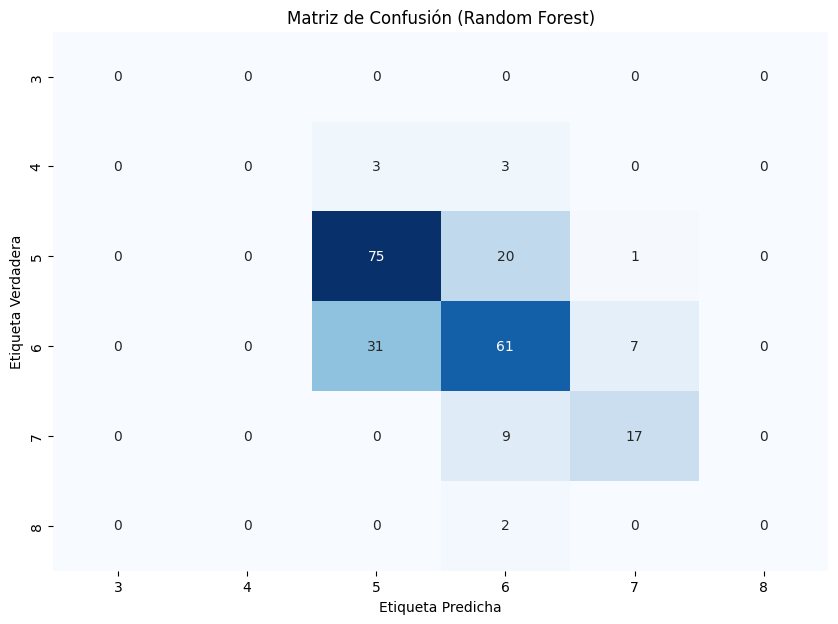

In [27]:
#--------------------------------------------------------------------------------
# PASO 20: ANÁLISIS DETALLADO DEL MEJOR MODELO
#--------------------------------------------------------------------------------

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. REVERSIÓN DE LA CODIFICACIÓN DE ETIQUETAS PARA LEGIBILIDAD ---

# Usamos el método .inverse_transform() de nuestro LabelEncoder (le) para obtener
# una lista de todas las clases posibles en su formato original (ej: 3, 4, 5...).
# Hacemos esto sobre y_train para asegurarnos de capturar todas las clases que el modelo conoce.
y_train_ = le.inverse_transform(y_train)
classes = np.unique(y_train_)

# Hacemos predicciones con el modelo Random Forest. El resultado `y_pred_`
# estará en el formato codificado (0, 1, 2...).
y_pred_ = random_forest.predict(X_test)

# Ahora, convertimos tanto las predicciones como las etiquetas de prueba verdaderas
# de vuelta a su formato original para que los informes sean fáciles de leer.
y_pred = le.inverse_transform(y_pred_)
y_test = le.inverse_transform(y_test)

# --- 2. GENERACIÓN DEL REPORTE DE CLASIFICACIÓN ---

# Esta función genera un informe de texto que muestra las principales métricas de
# clasificación para cada una de las clases.
print("--- Reporte de Clasificación (Random Forest) ---")
print(classification_report(y_test, y_pred, zero_division=0, labels=classes))

# --- 3. GENERACIÓN DE LA MATRIZ DE CONFUSIÓN ---

# Calculamos la matriz de confusión. Esta tabla cuenta las ocurrencias de
# predicciones correctas e incorrectas para cada clase.
conf_mat = confusion_matrix(y_test, y_pred, labels=classes)

# Usamos Seaborn y Matplotlib para visualizar la matriz de confusión como un mapa de calor.
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión (Random Forest)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()


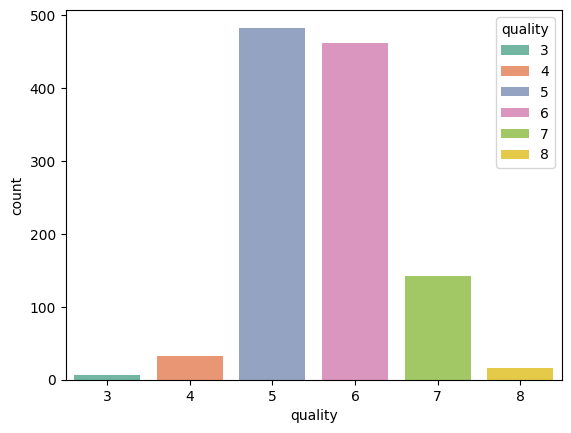

In [28]:
#--------------------------------------------------------------------------------
# PASO 21: ANÁLISIS DE LA DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (Paso inicial de EDA)
#--------------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt # Necesario para plt.show()

# Diagrama de barras de la variable objetivo
# Usamos la función `countplot` de Seaborn, diseñada específicamente para
# contar y graficar las ocurrencias de cada categoría en una columna.
sns.countplot(data=data, x='quality', palette='Set2', hue='quality')

# Mostramos el gráfico.
plt.show()

**Conclusiones Finales:**

Como se puede observar en la matriz de confusión, el modelo Random Forest tiene un rendimiento muy bueno para las clases 5, 6 y 7, con una precisión del 0.71, 0.67, 0,69 respectivamente. Sin embargo, el rendimiento del modelo es bajo para las clases 3, 4 y 8, con una precisión de 0.0 para cada una de ellas. Esto se debe a que el dataset está desbalanceado, ya que la mayoría de los vinos tienen una calidad de 5, 6 o 7. Por lo tanto, el modelo tiene un rendimiento muy bueno para las clases 5, 6 y 7, pero un rendimiento muy bajo para las clases 3, 4 y 8.

En este caso, la puntuación F1 es una métrica de evaluación más adecuada que la precisión, ya que tiene en cuenta tanto la precisión como la exhaustividad (recall). La puntuación F1 del modelo Random Forest es 0.61, lo que indica que el modelo tiene un rendimiento medio para todas las clases.